Testing Env

Goals
- import sentienl 2 imagery, display / plot RGB band
- import DEA fractional cover
- get bare soil % 
- compare all 3 plots

THEN
- import property boundaries (shapefiles), run analysis on stations
- chart across time?? selected pts??

In [1]:
%matplotlib inline

import datacube
import pandas as pd
from odc.ui import DcViewer
from odc.ui import with_ui_cbk

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", None)

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.plotting import display_map, rgb

from matplotlib.pyplot as plt
from datacube.utils.cog import write_cog



In [2]:
dc = datacube.Datacube(app="S2_Fractional_Cover_Assessment")

In [3]:
products = dc.list_products()
#products

####    Derived Products   ####

#ga_ls_fc_3 - Landsat Fractional Cover Collection 3
#ga_s2_ba_provisional_3 - Sentinel 2 Burnt Area

####  Sat   ####

#ga_s2am_ard_3 - Sentinel 2A MSI Analysis Ready Data
#ga_s2bm_ard_3 - Sentinel 2B MSI Analysis Ready Data

#ga_ls7e_ard_3 - Landsat 7 Analysis Ready Data
#ga_ls8c_ard_3 - Landsat 8 Analysis Ready Data
#ga_ls9c_ard_3 - Landsat 9 Analysis ready Data

####   Other    ####

#geodata_coast_100k - Coastline of Aus

In [14]:
fractional_cover = "ga_ls_fc_3"
s2a = "ga_s2am_ard_3"
s2b = "ga_s2bm_ard_3"
l8 = "ga_ls8c_ard_3"

measurements = dc.list_measurements()
measurements.loc[s2a]

name    dtype units nodata  \
measurement                                                                    
nbart_coastal_aerosol            nbart_coastal_aerosol    int16     1   -999   
nbart_blue                                  nbart_blue    int16     1   -999   
nbart_green                                nbart_green    int16     1   -999   
nbart_red                                    nbart_red    int16     1   -999   
nbart_red_edge_1                      nbart_red_edge_1    int16     1   -999   
nbart_red_edge_2                      nbart_red_edge_2    int16     1   -999   
nbart_red_edge_3                      nbart_red_edge_3    int16     1   -999   
nbart_nir_1                                nbart_nir_1    int16     1   -999   
nbart_nir_2                                nbart_nir_2    int16     1   -999   
nbart_swir_2                              nbart_swir_2    int16     1   -999   
nbart_swir_3                              nbart_swir_3    int16     1   -999   
oa_fmask                                      oa_fmask    uint8     1      0   
oa_nbart_contiguity                oa_nbart_contiguity    uint8     1    255   
oa_azimuthal_exiting              oa_azimuthal_exiting  float32     1    NaN   
oa_azimuthal_incident            oa_azimuthal_incident  float32     1    NaN   
oa_combined_terrain_shadow  oa_combined_terrain_shadow    uint8     1    255   
oa_exiting_angle                      oa_exiting_angle  float32     1    NaN   
oa_incident_angle                    oa_incident_angle  float32     1    NaN   
oa_relative_azimuth                oa_relative_azimuth  float32     1    NaN   
oa_relative_slope                    oa_relative_slope  float32     1    NaN   
oa_satellite_azimuth              oa_satellite_azimuth  float32     1    NaN   
oa_satellite_view                    oa_satellite_view  float32     1    NaN   
oa_solar_azimuth                      oa_solar_azimuth  float32     1    NaN   
oa_solar_zenith                        oa_solar_zenith  float32     1    NaN   
oa_time_delta                            oa_time_delta  float32     1    NaN   
oa_s2cloudless_mask                oa_s2cloudless_mask    uint8     1      0   
oa_s2cloudless_prob                oa_s2cloudless_prob  float64     1    NaN   

                                                                       aliases  \
measurement                                                                      
nbart_coastal_aerosol                          [nbart_band01, coastal_aerosol]   
nbart_blue                                                [nbart_band02, blue]   
nbart_green                                              [nbart_band03, green]   
nbart_red                                                  [nbart_band04, red]   
nbart_red_edge_1                                    [nbart_band05, red_edge_1]   
nbart_red_edge_2                                    [nbart_band06, red_edge_2]   
nbart_red_edge_3                                    [nbart_band07, red_edge_3]   
nbart_nir_1                            [nbart_band08, nir_1, nbart_common_nir]   
nbart_nir_2                                              [nbart_band8a, nir_2]   
nbart_swir_2                [nbart_band11, swir_2, nbart_common_swir_1, swir2]   
nbart_swir_3                       [nbart_band12, swir_3, nbart_common_swir_2]   
oa_fmask                                                               [fmask]   
oa_nbart_contiguity                                         [nbart_contiguity]   
oa_azimuthal_exiting                                       [azimuthal_exiting]   
oa_azimuthal_incident                                     [azimuthal_incident]   
oa_combined_terrain_shadow                           [combined_terrain_shadow]   
oa_exiting_angle                                               [exiting_angle]   
oa_incident_angle                                             [incident_angle]   
oa_relative_azimuth                                         [relative_azimuth]   
oa_rela

In [5]:
"""
DcViewer(dc=dc,
         time="2015",
         width="800px",
         center=(-27.48, 153.10),
         zoom=7)
"""

'\nDcViewer(dc=dc,\n         time="2015",\n         width="800px",\n         center=(-27.48, 153.10),\n         zoom=7)\n'

In [6]:
#Testing product - adjust paramas later

ds = dc.load(product="ga_ls8c_nbart_gm_cyear_3",
             measurements=["red", "green", "blue"],
             x=(153.3, 153.4),
             y=(-27.5, -27.6),
             time=("2015-01-01", "2015-12-31"))

#ds
#ds.red

In [7]:
#Testing env - progress box

query = {"x": (153.3, 153.4),
         "y": (-27.5, -27.6),
         "time": ("2015-01-01", "2015-12-31")}

"""
ds_s2a = dc.load(product="ga_s2am_ard_3",
                 progress_cbk=with_ui_cbk(),
                 **query)

#ds_s2a
"""

'\nds_s2a = dc.load(product="ga_s2am_ard_3",\n                 progress_cbk=with_ui_cbk(),\n                 **query)\n\n#ds_s2a\n'

In [8]:
#Start plotting module

lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.4)
time_range = ("2020-01-01", "2020-02-01")

In [9]:
display_map(x=lon_range, y=lat_range)

In [10]:
ds_s2 = dc.load(product="ga_s2am_ard_3",
                x=lon_range,
                y=lat_range,
                time=time_range,
                progress_cbk=with_ui_cbk())

ds_s2

<xarray.Dataset>
Dimensions:                     (time: 6, y: 1114, x: 1123)
Coordinates:
  * time                        (time) datetime64[ns] 2020-01-06T23:54:18.435...
  * y                           (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06
  * x                           (x) float64 2.066e+06 2.066e+06 ... 2.077e+06
    spatial_ref                 int32 3577
Data variables: (12/27)
    nbart_coastal_aerosol       (time, y, x) int16 5080 5080 5080 ... 479 479
    nbart_blue                  (time, y, x) int16 4903 4903 4924 ... 443 411
    nbart_green                 (time, y, x) int16 5026 4915 4826 ... 476 525
    nbart_red                   (time, y, x) int16 5103 4997 4867 ... 388 392
    nbart_red_edge_1            (time, y, x) int16 5346 5346 5131 ... 742 742
    nbart_red_edge_2            (time, y, x) int16 5409 5409 5194 ... 1575 1575
    ...                          ...
    oa_satellite_view           (time, y, x) float32 8.166 8.166 ... 10.4 10.4
    oa_solar_azimuth            (time, y, x) float32 85.81 85.81 ... 75.86 75.86
    oa_solar_zenith             (time, y, x) float32 27.23 27.23 ... 28.22 28.22
    oa_time_delta               (time, y, x) float32 3.594 3.594 ... -2.097
    oa_s2cloudless_mask         (time, y, x) uint8 2 2 2 2 2 2 2 ... 1 1 1 1 1 1
    oa_s2cloudless_prob         (time, y, x) float64 0.9966 0.9966 ... 0.05428
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [20]:
first_timestep = ds_s2.isel(time=1)

first_timestep

<xarray.Dataset>
Dimensions:                     (y: 1114, x: 1123)
Coordinates:
    time                        datetime64[ns] 2020-01-10T00:04:14.051798
  * y                           (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06
  * x                           (x) float64 2.066e+06 2.066e+06 ... 2.077e+06
    spatial_ref                 int32 3577
Data variables: (12/27)
    nbart_coastal_aerosol       (y, x) int16 609 609 609 609 ... 4112 4112 4112
    nbart_blue                  (y, x) int16 571 569 570 564 ... 4142 4316 4506
    nbart_green                 (y, x) int16 666 666 664 651 ... 4219 4421 4588
    nbart_red                   (y, x) int16 524 527 510 518 ... 4291 4523 4715
    nbart_red_edge_1            (y, x) int16 864 864 839 839 ... 4226 4804 4804
    nbart_red_edge_2            (y, x) int16 1849 1849 1874 ... 4500 4975 4975
    ...                          ...
    oa_satellite_view           (y, x) float32 9.382 9.382 9.384 ... 10.42 10.42
    oa_solar_azimuth            (y, x) float32 83.6 83.6 83.6 ... 83.34 83.34
    oa_solar_zenith             (y, x) float32 25.44 25.44 25.44 ... 25.33 25.33
    oa_time_delta               (y, x) float32 -3.255 -3.255 ... -2.302 -2.302
    oa_s2cloudless_mask         (y, x) uint8 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2 2
    oa_s2cloudless_prob         (y, x) float64 0.1571 0.1571 ... 0.989 0.989
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [18]:
jan_timestep = ds_s2.sel(time="2020-01")

jan_timestep

<xarray.Dataset>
Dimensions:                     (time: 6, y: 1114, x: 1123)
Coordinates:
  * time                        (time) datetime64[ns] 2020-01-06T23:54:18.435...
  * y                           (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06
  * x                           (x) float64 2.066e+06 2.066e+06 ... 2.077e+06
    spatial_ref                 int32 3577
Data variables: (12/27)
    nbart_coastal_aerosol       (time, y, x) int16 5080 5080 5080 ... 479 479
    nbart_blue                  (time, y, x) int16 4903 4903 4924 ... 443 411
    nbart_green                 (time, y, x) int16 5026 4915 4826 ... 476 525
    nbart_red                   (time, y, x) int16 5103 4997 4867 ... 388 392
    nbart_red_edge_1            (time, y, x) int16 5346 5346 5131 ... 742 742
    nbart_red_edge_2            (time, y, x) int16 5409 5409 5194 ... 1575 1575
    ...                          ...
    oa_satellite_view           (time, y, x) float32 8.166 8.166 ... 10.4 10.4
    oa_solar_azimuth            (time, y, x) float32 85.81 85.81 ... 75.86 75.86
    oa_solar_zenith             (time, y, x) float32 27.23 27.23 ... 28.22 28.22
    oa_time_delta               (time, y, x) float32 3.594 3.594 ... -2.097
    oa_s2cloudless_mask         (time, y, x) uint8 2 2 2 2 2 2 2 ... 1 1 1 1 1 1
    oa_s2cloudless_prob         (time, y, x) float64 0.9966 0.9966 ... 0.05428
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [26]:
measurements.loc[s2a]

name    dtype units nodata  \
measurement                                                                    
nbart_coastal_aerosol            nbart_coastal_aerosol    int16     1   -999   
nbart_blue                                  nbart_blue    int16     1   -999   
nbart_green                                nbart_green    int16     1   -999   
nbart_red                                    nbart_red    int16     1   -999   
nbart_red_edge_1                      nbart_red_edge_1    int16     1   -999   
nbart_red_edge_2                      nbart_red_edge_2    int16     1   -999   
nbart_red_edge_3                      nbart_red_edge_3    int16     1   -999   
nbart_nir_1                                nbart_nir_1    int16     1   -999   
nbart_nir_2                                nbart_nir_2    int16     1   -999   
nbart_swir_2                              nbart_swir_2    int16     1   -999   
nbart_swir_3                              nbart_swir_3    int16     1   -999   
oa_fmask                                      oa_fmask    uint8     1      0   
oa_nbart_contiguity                oa_nbart_contiguity    uint8     1    255   
oa_azimuthal_exiting              oa_azimuthal_exiting  float32     1    NaN   
oa_azimuthal_incident            oa_azimuthal_incident  float32     1    NaN   
oa_combined_terrain_shadow  oa_combined_terrain_shadow    uint8     1    255   
oa_exiting_angle                      oa_exiting_angle  float32     1    NaN   
oa_incident_angle                    oa_incident_angle  float32     1    NaN   
oa_relative_azimuth                oa_relative_azimuth  float32     1    NaN   
oa_relative_slope                    oa_relative_slope  float32     1    NaN   
oa_satellite_azimuth              oa_satellite_azimuth  float32     1    NaN   
oa_satellite_view                    oa_satellite_view  float32     1    NaN   
oa_solar_azimuth                      oa_solar_azimuth  float32     1    NaN   
oa_solar_zenith                        oa_solar_zenith  float32     1    NaN   
oa_time_delta                            oa_time_delta  float32     1    NaN   
oa_s2cloudless_mask                oa_s2cloudless_mask    uint8     1      0   
oa_s2cloudless_prob                oa_s2cloudless_prob  float64     1    NaN   

                                                                       aliases  \
measurement                                                                      
nbart_coastal_aerosol                          [nbart_band01, coastal_aerosol]   
nbart_blue                                                [nbart_band02, blue]   
nbart_green                                              [nbart_band03, green]   
nbart_red                                                  [nbart_band04, red]   
nbart_red_edge_1                                    [nbart_band05, red_edge_1]   
nbart_red_edge_2                                    [nbart_band06, red_edge_2]   
nbart_red_edge_3                                    [nbart_band07, red_edge_3]   
nbart_nir_1                            [nbart_band08, nir_1, nbart_common_nir]   
nbart_nir_2                                              [nbart_band8a, nir_2]   
nbart_swir_2                [nbart_band11, swir_2, nbart_common_swir_1, swir2]   
nbart_swir_3                       [nbart_band12, swir_3, nbart_common_swir_2]   
oa_fmask                                                               [fmask]   
oa_nbart_contiguity                                         [nbart_contiguity]   
oa_azimuthal_exiting                                       [azimuthal_exiting]   
oa_azimuthal_incident                                     [azimuthal_incident]   
oa_combined_terrain_shadow                           [combined_terrain_shadow]   
oa_exiting_angle                                               [exiting_angle]   
oa_incident_angle                                             [incident_angle]   
oa_relative_azimuth                                         [relative_azimuth]   
oa_rela

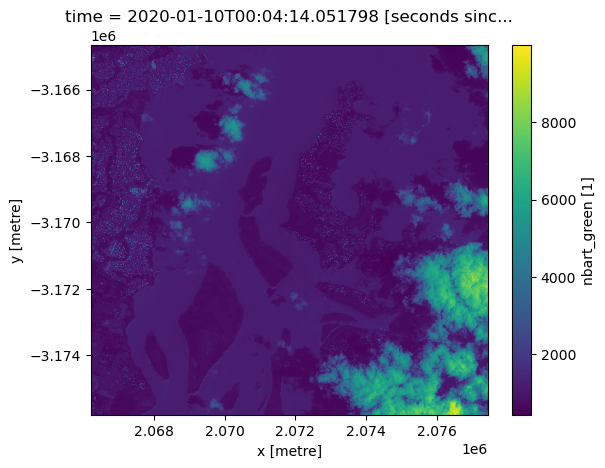

In [36]:
first_timestep.nbart_green.plot()

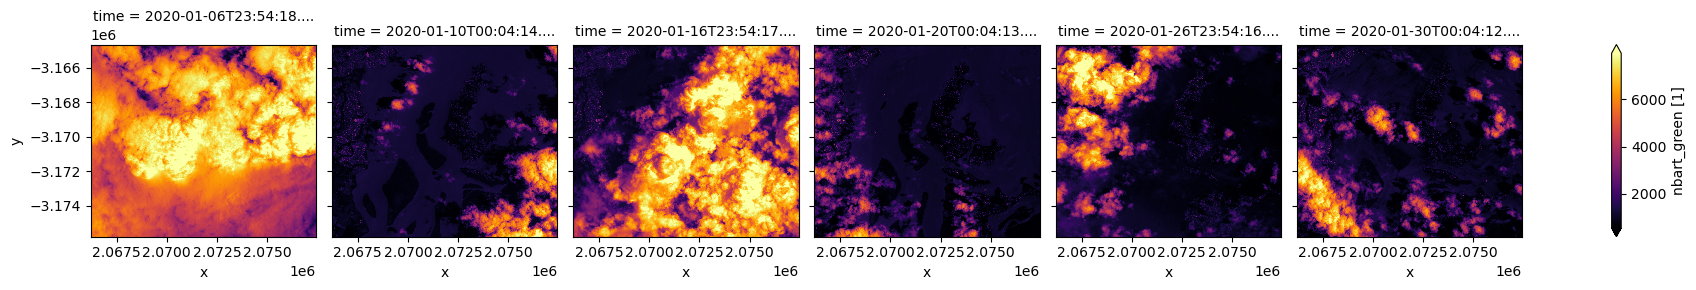

In [44]:
ds_s2.nbart_green.plot(col="time", robust=True, cmap="inferno")

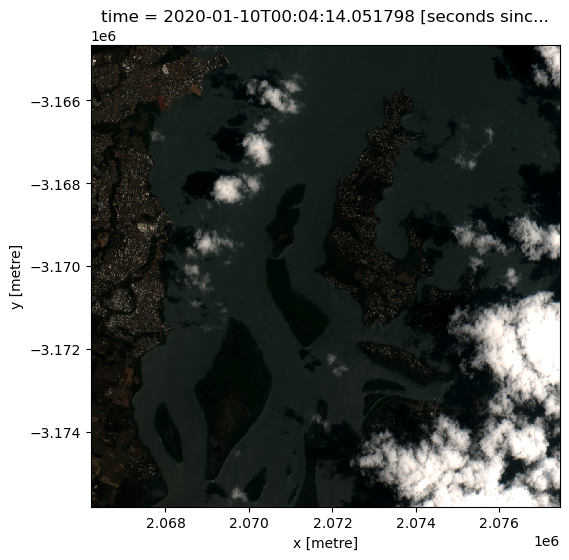

In [49]:
rgb(ds_s2, bands=["nbart_red", "nbart_green", "nbart_blue"], index=1)

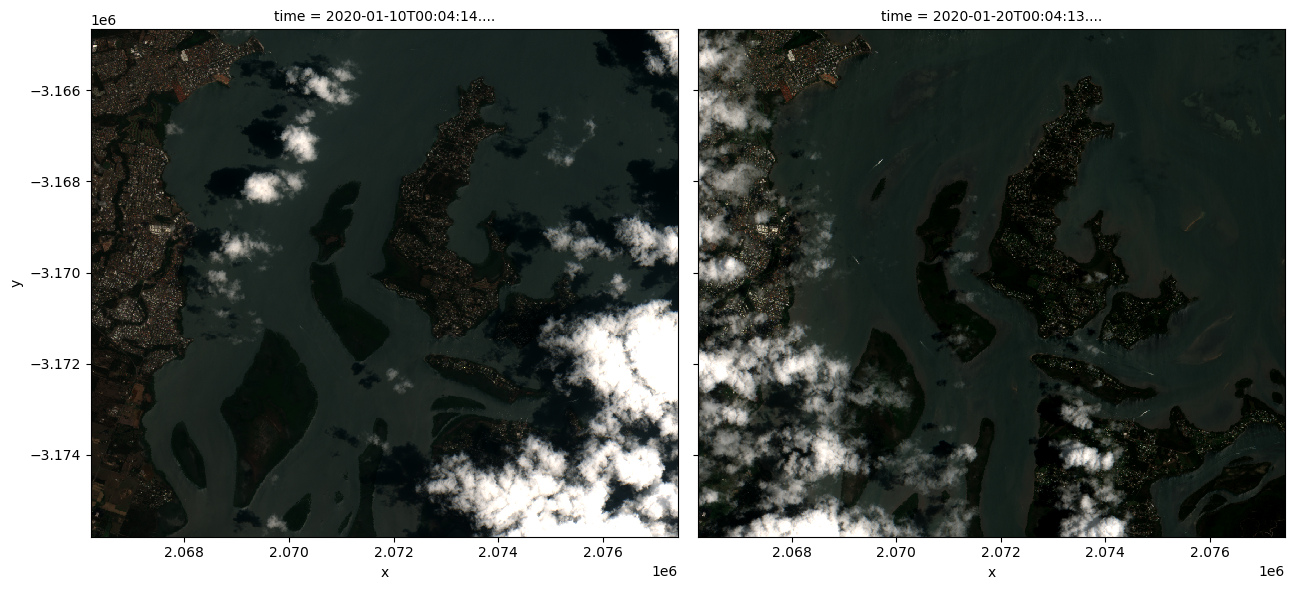

In [51]:
rgb(ds_s2, bands=["nbart_red", "nbart_green", "nbart_blue"], index=[1, 3])

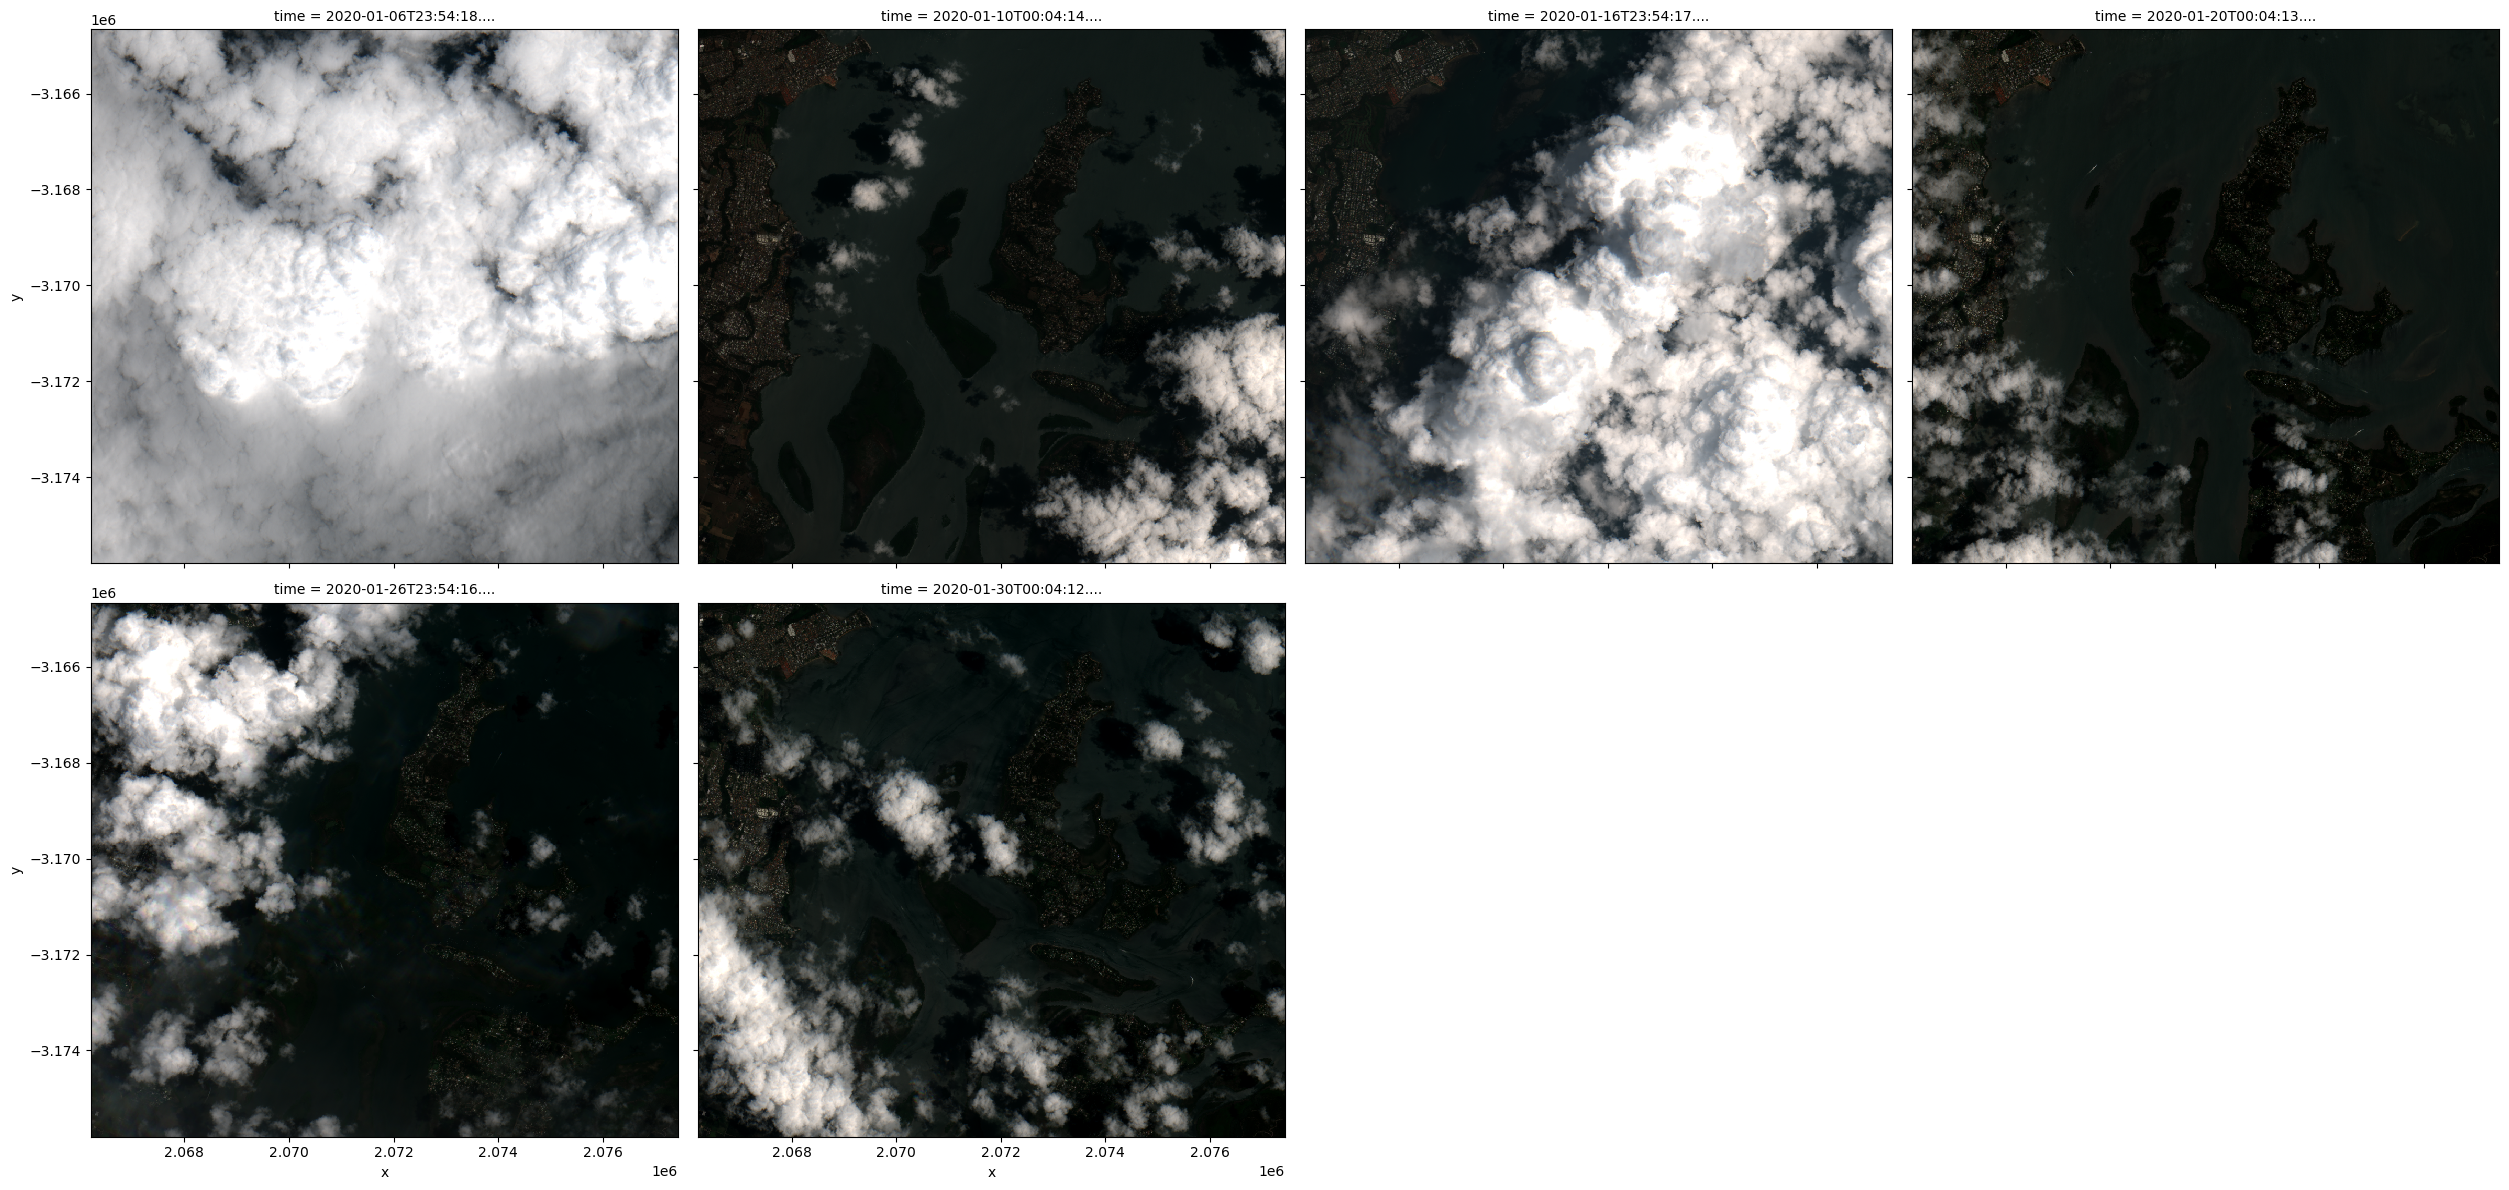

In [52]:
rgb(ds_s2, bands=["nbart_red", "nbart_green", "nbart_blue"], col="time")

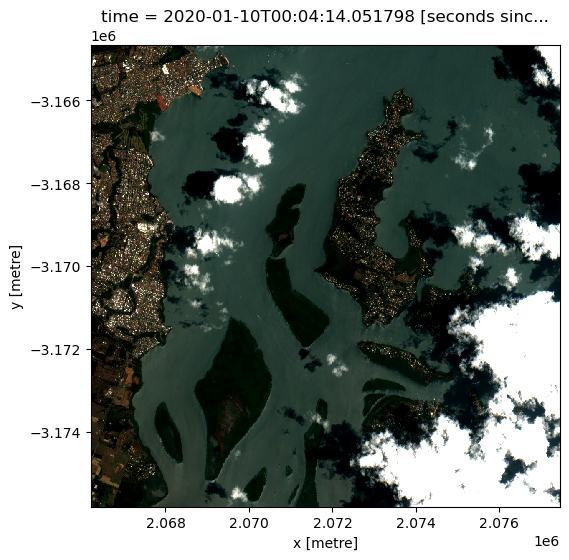

In [55]:
rgb(ds_s2, 
    bands=['nbart_red', 'nbart_green', 'nbart_blue'], 
    index=1, 
    percentile_stretch=[0.1, 0.9])